# Linear Regression


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2.  線性迴歸訓練資料、測試資料

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數<br>
之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)
<br>分成training 和test，用test資料給module打分數(誤差值)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
x = np.linspace(0, 5, 50)
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)#內建幫你切割資料的函式
#                                             random state 沒有內建數值是隨機打散資料 如果有設聘數值，相同數值打亂方式相同
print(x_train)#生成dataset

[4.08163265 1.73469388 1.83673469 0.         2.75510204 3.36734694
 3.67346939 4.28571429 1.02040816 0.30612245 4.18367347 1.32653061
 4.69387755 0.20408163 3.87755102 3.97959184 0.51020408 4.3877551
 3.7755102  3.06122449 0.6122449  2.95918367 1.63265306 1.93877551
 5.         4.48979592 2.14285714 3.26530612 3.46938776 0.71428571
 2.24489796 1.12244898 2.04081633 0.91836735 4.89795918 2.85714286
 3.16326531 1.53061224 2.65306122 3.57142857]


In [8]:
y

array([-0.09115201,  2.01215126,  0.86682148,  2.20485452,  0.82736069,
        1.31875324,  0.07305   ,  1.26756822,  0.38095191,  2.66363111,
        1.69665074,  1.395396  ,  1.55993066,  2.47212773,  2.37787087,
        1.77999182,  2.89545194,  2.94870671,  1.84649729,  2.75959855,
        3.83542628,  4.88301696,  3.60252639,  3.39020057,  4.27990137,
        4.41684736,  3.46633508,  4.26729097,  5.09508202,  4.75768559,
        3.79506603,  4.18546352,  4.90439826,  5.37979305,  5.22048741,
        4.38351372,  5.08845191,  5.39503682,  4.41530059,  6.03104449,
        6.515469  ,  6.24375998,  5.15645072,  6.68592548,  5.53322591,
        5.45402914,  7.49077017,  6.04873924,  6.75822161,  6.95578593])

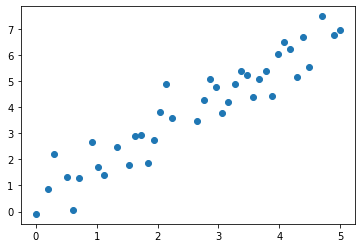

In [9]:
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [10]:
regr = LinearRegression()
X_train = x_train.reshape(-1,1)#dataset reshape成二維
regr.fit(X_train,y_train)
print('Coefficients: ', regr.coef_)
print('interception: ', regr.intercept_)

Coefficients:  [1.29208113]
interception:  0.5349467804285664


In [11]:
Y_train = regr.predict(X_train)

In [14]:
mse = np.sum((Y_train-y_train)**2) / len(y_train)#檢查誤差值
print(mse)

0.42652973943861505


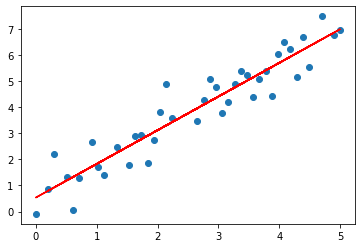

In [15]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, 'r')

#### test with test data

In [16]:
X_test = x_test.reshape(-1,1)
Y_test = regr.predict(X_test)

print(Y_test)#用內建涵式印出

[2.11708694 2.38077697 1.06232684 1.58970689 6.4679724  0.66679179
 3.83107212 3.69922711 6.73166242 3.5673821 ]


$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [18]:
#Y=WX+b
W=regr.coef_
b=regr.intercept_
W*X_test+b
#從知道的w和b手動算出

array([[2.11708694],
       [2.38077697],
       [1.06232684],
       [1.58970689],
       [6.4679724 ],
       [0.66679179],
       [3.83107212],
       [3.69922711],
       [6.73166242],
       [3.5673821 ]])

In [20]:
mse = np.sum((Y_test-y_test)**2) / len(y_test)
print(mse)#mse誤差m誤差 越接近0越好

0.5842894882738393


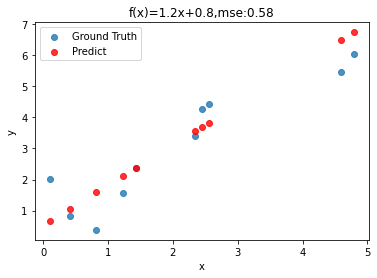

In [21]:
title='f(x)=1.2x+0.8'+',mse:'+str(round(mse,2))
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
#plt.grid(True)
plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth')
plt.scatter(x_test, Y_test, c='r', alpha=0.8,label='Predict')
plt.legend()